In [1]:
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
import math

data_path = "data"
output_path = "output/"
temp_path = "tmp/"

In [2]:
# Load the test data
test_df = pd.read_parquet(f"{data_path}/test_data.parquet")
print(test_df.shape)
print(list(test_df.columns))
test_df.head()

(12065, 96)
['timestamp', 'underlying', 'call_iv_24000', 'call_iv_24100', 'call_iv_24200', 'call_iv_24300', 'call_iv_24400', 'call_iv_24500', 'call_iv_24600', 'call_iv_24700', 'call_iv_24800', 'call_iv_24900', 'call_iv_25000', 'call_iv_25100', 'call_iv_25200', 'call_iv_25300', 'call_iv_25400', 'call_iv_25500', 'call_iv_25600', 'call_iv_25700', 'call_iv_25800', 'call_iv_25900', 'call_iv_26000', 'call_iv_26100', 'call_iv_26200', 'call_iv_26300', 'call_iv_26400', 'call_iv_26500', 'put_iv_23000', 'put_iv_23100', 'put_iv_23200', 'put_iv_23300', 'put_iv_23400', 'put_iv_23500', 'put_iv_23600', 'put_iv_23700', 'put_iv_23800', 'put_iv_23900', 'put_iv_24000', 'put_iv_24100', 'put_iv_24200', 'put_iv_24300', 'put_iv_24400', 'put_iv_24500', 'put_iv_24600', 'put_iv_24700', 'put_iv_24800', 'put_iv_24900', 'put_iv_25000', 'put_iv_25100', 'put_iv_25200', 'put_iv_25300', 'put_iv_25400', 'put_iv_25500', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 

,timestamp,underlying,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
0,0,24735.9,0.280939,NaN,NaN,NaN,0.242149,NaN,0.232439,NaN,...,0.006587,0.002826,-1.737617e+05,-0.009541,-0.017831,0.000264,2.032521e+06,1.000000e-06,-0.077238,-5.362742e+06
1,1,24766.7,0.270276,NaN,0.258893,NaN,NaN,NaN,0.233548,NaN,...,0.005777,0.004588,-3.195086e+05,-0.024106,-0.004696,-0.000158,-4.529075e+06,-1.619022e+06,-0.956928,4.624907e+06
2,2,24896.9,NaN,0.251731,NaN,NaN,0.214869,0.20458,0.194604,NaN,...,0.000829,-0.034944,1.027525e+06,0.028201,0.032234,0.007687,2.663908e+06,0.000000e+00,-0.116264,-2.669766e+06
3,3,24898.1,0.241888,NaN,0.220505,NaN,0.198602,0.18619,NaN,NaN,...,-0.009323,-0.022969,-4.720074e+06,-0.001513,0.008704,-0.000206,-7.672936e+06,-1.903406e+06,-2.249208,-1.858254e+07
4,4,24906.5,0.235328,NaN,0.222983,0.214126,NaN,NaN,0.192603,NaN,...,-0.018674,-0.007588,-4.051681e+05,-0.136267,0.002425,-0.002200,1.334469e+06,2.548789e+05,1.999104,3.024212e+06


In [3]:
test_df.isna().sum().sum()

376504

In [4]:
# Load the training data
train_df = pd.read_parquet(f"{data_path}/train_data.parquet")
print(train_df.shape)
print(list(train_df.columns))
train_df.head()

(178340, 97)
['timestamp', 'underlying', 'expiry', 'call_iv_23500', 'call_iv_23600', 'call_iv_23700', 'call_iv_23800', 'call_iv_23900', 'call_iv_24000', 'call_iv_24100', 'call_iv_24200', 'call_iv_24300', 'call_iv_24400', 'call_iv_24500', 'call_iv_24600', 'call_iv_24700', 'call_iv_24800', 'call_iv_24900', 'call_iv_25000', 'call_iv_25100', 'call_iv_25200', 'call_iv_25300', 'call_iv_25400', 'call_iv_25500', 'call_iv_25600', 'call_iv_25700', 'call_iv_25800', 'call_iv_25900', 'call_iv_26000', 'put_iv_22500', 'put_iv_22600', 'put_iv_22700', 'put_iv_22800', 'put_iv_22900', 'put_iv_23000', 'put_iv_23100', 'put_iv_23200', 'put_iv_23300', 'put_iv_23400', 'put_iv_23500', 'put_iv_23600', 'put_iv_23700', 'put_iv_23800', 'put_iv_23900', 'put_iv_24000', 'put_iv_24100', 'put_iv_24200', 'put_iv_24300', 'put_iv_24400', 'put_iv_24500', 'put_iv_24600', 'put_iv_24700', 'put_iv_24800', 'put_iv_24900', 'put_iv_25000', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X1

,timestamp,underlying,expiry,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
0,1745296089000000000,24160.9,2025-04-24,0.237872,0.213056,0.191247,0.173081,0.157550,0.146430,0.140084,...,0.013995,0.007922,-1.947502e+05,0.024715,0.530894,-0.002354,-3.224848e+05,-1.600795e+06,13063.446970,445511.363636
1,1745304077000000000,24188.1,2025-04-24,0.236015,0.213177,0.189552,0.169672,0.153648,0.141522,0.134405,...,-0.004976,-0.009555,-1.481909e+06,-0.004020,-1.429919,-0.000843,1.658073e+06,-1.742468e+06,31364.628427,-46123.161765
2,1745313495000000000,24148.6,2025-04-24,0.225757,0.199469,0.178547,0.156187,0.140276,0.130288,0.124253,...,-0.012869,-0.004012,-1.250688e+06,-0.035342,-0.523109,0.013778,-2.646675e+06,-5.051008e+07,-847564.971737,-225333.881579
3,1745313499000000000,24147.4,2025-04-24,0.220805,0.195398,0.176247,0.155271,0.139753,0.129641,0.123994,...,-0.006014,0.004207,6.378700e+05,-0.045472,0.741664,0.002590,-1.607321e+06,4.170899e+05,333918.361928,-114960.453869
4,1745313608000000000,24155.9,2025-04-24,0.220088,0.195815,0.177803,0.156409,0.141458,0.130448,0.124707,...,0.020878,-0.001747,9.592702e+04,0.044814,-0.015472,0.012185,6.820360e+05,4.081106e+06,3309.895833,183946.289063


In [5]:
# count the number of values in each group after grouping by expiry in train_df
expiry_counts = train_df.groupby("expiry").size()
expiry_counts

expiry
2025-04-24    19959
2025-04-30    79204
2025-05-08    79177
dtype: int64

In [6]:
call_cols = [col for col in train_df.columns if col.startswith("call")]
put_cols = [col for col in train_df.columns if col.startswith("put")]

In [11]:
train_df[call_cols].describe()

,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,...,call_iv_25100,call_iv_25200,call_iv_25300,call_iv_25400,call_iv_25500,call_iv_25600,call_iv_25700,call_iv_25800,call_iv_25900,call_iv_26000
count,178340.000000,1.783400e+05,178340.000000,1.783400e+05,1.783400e+05,178340.000000,178340.000000,178340.000000,178340.000000,178340.000000,...,178340.000000,178340.000000,178340.000000,178340.000000,178340.000000,178340.000000,178340.000000,178340.000000,178340.000000,178340.000000
mean,0.423909,-3.220020e+07,0.349236,3.499773e+05,1.429192e+03,1.580317,0.195213,0.160997,0.140099,0.146883,...,0.320258,0.347353,0.374616,0.402681,0.430627,0.458028,0.487559,0.514576,0.541998,0.567925
std,2.178706,6.800128e+09,1.984786,7.389699e+07,5.550653e+05,402.799771,0.056097,0.032196,0.019030,0.042241,...,0.260002,0.289571,0.318445,0.348030,0.374917,0.402063,0.431582,0.457457,0.482609,0.511664
min,0.186658,-1.435870e+12,0.036630,-1.244180e+05,-9.622650e+04,-0.045733,0.123994,0.074081,0.098799,0.088855,...,0.127407,0.127103,0.128379,0.130255,0.133647,0.137678,0.143072,0.150297,0.159343,-1.000000
25%,0.256790,2.417285e-01,0.226604,2.107440e-01,1.925507e-01,0.173014,0.161050,0.143029,0.126570,0.120669,...,0.179128,0.186894,0.192386,0.199843,0.210027,0.219939,0.231749,0.243981,0.257300,0.269093
50%,0.297625,2.770240e-01,0.256366,2.354450e-01,2.165680e-01,0.196701,0.174057,0.157880,0.142767,0.142993,...,0.201439,0.211630,0.227777,0.243517,0.261068,0.276741,0.293137,0.307999,0.324696,0.339606
75%,0.404716,3.753433e-01,0.346050,3.155980e-01,2.813773e-01,0.246242,0.210348,0.168074,0.154400,0.154996,...,0.263311,0.288411,0.310862,0.333904,0.357975,0.381178,0.405130,0.429879,0.453153,0.473263
max,912.411000,7.904570e+08,833.879000,1.560360e+10,2.334040e+08,120282.000000,0.633309,0.445672,0.259043,0.418226,...,1.714600,1.887480,2.056050,2.230440,2.386690,2.556640,2.727340,2.890430,3.040330,3.185600


In [14]:
test_df[[col for col in test_df.columns if col.startswith("call")]].describe()

,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,call_iv_24800,call_iv_24900,...,call_iv_25600,call_iv_25700,call_iv_25800,call_iv_25900,call_iv_26000,call_iv_26100,call_iv_26200,call_iv_26300,call_iv_26400,call_iv_26500
count,4762.000000,4786.000000,4838.000000,4882.000000,4855.000000,4852.000000,4787.000000,4850.000000,4819.000000,4900.000000,...,4838.000000,4830.000000,4852.000000,4797.000000,4786.000000,4841.000000,4840.000000,4766.000000,4845.000000,4972.000000
mean,0.256363,0.246952,0.236247,0.226294,0.216683,0.208504,0.201364,0.194952,0.191766,0.190807,...,0.229995,0.240075,0.249833,0.261991,0.274775,0.286267,0.302835,0.318034,0.335247,0.353179
std,0.023853,0.021822,0.021306,0.021189,0.021575,0.022383,0.022996,0.023187,0.023228,0.024128,...,0.037123,0.040480,0.043743,0.048482,0.054255,0.060219,0.064629,0.068304,0.072099,0.075736
min,0.211965,0.202257,0.192681,0.184373,0.174893,0.167585,0.159284,0.154661,0.154145,0.156998,...,0.184541,0.190124,0.194327,0.199752,0.205587,0.210216,0.218854,0.227166,0.239034,0.250944
25%,0.239741,0.232181,0.222599,0.213123,0.203543,0.195321,0.187535,0.180466,0.175828,0.172899,...,0.189893,0.195023,0.200628,0.207164,0.214648,0.221093,0.231049,0.241809,0.254510,0.268849
50%,0.246227,0.240036,0.229500,0.219496,0.210058,0.201290,0.193798,0.187498,0.183309,0.179918,...,0.220073,0.230588,0.241778,0.253504,0.266377,0.275988,0.292632,0.309030,0.325795,0.341715
75%,0.276737,0.264015,0.254009,0.246418,0.238230,0.231477,0.226482,0.220966,0.217706,0.217903,...,0.262877,0.273610,0.286954,0.301258,0.318385,0.337596,0.358635,0.376131,0.398797,0.422453
max,0.329322,0.325091,0.294849,0.280493,0.267558,0.257639,0.250346,0.245681,0.241232,0.244315,...,0.311196,0.323609,0.335483,0.355068,0.376314,0.400018,0.420974,0.440311,0.462806,0.483044


In [17]:
train_df[[col for col in train_df.columns if col.startswith("put")]].describe()

,put_iv_22500,put_iv_22600,put_iv_22700,put_iv_22800,put_iv_22900,put_iv_23000,put_iv_23100,put_iv_23200,put_iv_23300,put_iv_23400,...,put_iv_24100,put_iv_24200,put_iv_24300,put_iv_24400,put_iv_24500,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000
count,178340.000000,178340.000000,178340.000000,178340.000000,178340.000000,178340.000000,178340.000000,178340.000000,178340.000000,178340.000000,...,178340.000000,178340.000000,178340.000000,178340.000000,178340.000000,178340.000000,178340.000000,1.783400e+05,1.783400e+05,178340.000000
mean,0.714615,0.685310,0.653831,0.623892,0.593617,0.562876,0.533095,0.501335,0.469784,0.436856,...,0.197465,0.161484,0.202819,0.146219,0.167526,-5.504702,0.215651,2.674871e+02,-7.993783e+02,2.841638
std,0.548588,0.519128,0.487047,0.457528,0.426640,0.396008,0.367243,0.337593,0.308256,0.277488,...,0.061196,0.033927,18.889194,0.041308,0.073533,1578.184178,0.136148,1.139054e+05,2.026168e+05,1187.172542
min,0.280004,0.271069,0.261025,0.250862,0.242298,0.233207,0.223832,0.214042,0.204839,0.195874,...,0.123995,0.115095,0.085858,0.088587,0.090677,-569687.000000,0.110091,-4.406240e+04,-4.927230e+07,-41995.400000
25%,0.411896,0.398515,0.384419,0.370183,0.355741,0.340831,0.325871,0.310514,0.294878,0.278904,...,0.161410,0.142989,0.125099,0.119917,0.129901,0.138005,0.136754,1.396960e-01,1.519010e-01,0.165832
50%,0.496101,0.477766,0.459156,0.440944,0.421985,0.402674,0.383918,0.364120,0.343812,0.323707,...,0.174538,0.157837,0.142584,0.142658,0.145464,0.151954,0.164814,1.771705e-01,1.832955e-01,0.187437
75%,0.654227,0.635234,0.613133,0.590380,0.567002,0.542105,0.519194,0.493972,0.467289,0.439633,...,0.211534,0.168389,0.154447,0.154590,0.170070,0.174239,0.180940,1.974540e-01,2.192915e-01,0.241723
max,3.611360,3.430540,3.228630,3.067060,2.862470,2.700060,2.512630,2.335330,2.146830,1.961610,...,0.649681,0.466512,5640.720000,0.405349,0.613943,0.771441,1.009960,4.810240e+07,5.919130e+06,499573.000000


In [9]:
train_df[call_cols].max()

call_iv_23500    9.124110e+02
call_iv_23600    7.904570e+08
call_iv_23700    8.338790e+02
call_iv_23800    1.560360e+10
call_iv_23900    2.334040e+08
call_iv_24000    1.202820e+05
call_iv_24100    6.333090e-01
call_iv_24200    4.456720e-01
call_iv_24300    2.590430e-01
call_iv_24400    4.182260e-01
call_iv_24500    6.112460e-01
call_iv_24600    7.978210e-01
call_iv_24700    9.835960e-01
call_iv_24800    1.176260e+00
call_iv_24900    1.358350e+00
call_iv_25000    1.533640e+00
call_iv_25100    1.714600e+00
call_iv_25200    1.887480e+00
call_iv_25300    2.056050e+00
call_iv_25400    2.230440e+00
call_iv_25500    2.386690e+00
call_iv_25600    2.556640e+00
call_iv_25700    2.727340e+00
call_iv_25800    2.890430e+00
call_iv_25900    3.040330e+00
call_iv_26000    3.185600e+00
dtype: float64

In [12]:
train_df[call_cols].min()

call_iv_23500    1.866580e-01
call_iv_23600   -1.435870e+12
call_iv_23700    3.663000e-02
call_iv_23800   -1.244180e+05
call_iv_23900   -9.622650e+04
call_iv_24000   -4.573320e-02
call_iv_24100    1.239940e-01
call_iv_24200    7.408070e-02
call_iv_24300    9.879930e-02
call_iv_24400    8.885520e-02
call_iv_24500    9.111250e-02
call_iv_24600    1.003230e-01
call_iv_24700    1.108500e-01
call_iv_24800    1.195900e-01
call_iv_24900    1.273560e-01
call_iv_25000    1.274670e-01
call_iv_25100    1.274070e-01
call_iv_25200    1.271030e-01
call_iv_25300    1.283790e-01
call_iv_25400    1.302550e-01
call_iv_25500    1.336470e-01
call_iv_25600    1.376780e-01
call_iv_25700    1.430720e-01
call_iv_25800    1.502970e-01
call_iv_25900    1.593430e-01
call_iv_26000   -1.000000e+00
dtype: float64

Top 10 maximum values for call columns:


,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,...,call_iv_25100,call_iv_25200,call_iv_25300,call_iv_25400,call_iv_25500,call_iv_25600,call_iv_25700,call_iv_25800,call_iv_25900,call_iv_26000
0,912.41100,7.904570e+08,833.87900,1.560360e+10,2.334040e+08,120282.000000,0.633309,0.445672,0.259043,0.418226,...,1.71460,1.88748,2.05605,2.23044,2.38669,2.55664,2.72734,2.89043,3.04033,3.18560
1,2.06675,1.258500e+08,1.63281,1.560360e+10,2.164990e+07,120282.000000,0.606249,0.442338,0.253819,0.417862,...,1.71460,1.88719,2.05605,2.23044,2.38619,2.55613,2.72318,2.89043,3.04033,3.18560
2,2.03468,7.800870e+04,1.61950,1.560360e+10,1.036610e+00,0.829996,0.606249,0.432977,0.251771,0.417862,...,1.71407,1.88620,2.05571,2.22820,2.38564,2.55304,2.72318,2.89043,3.03706,3.18322
3,2.00672,1.868640e+00,1.61950,1.560360e+10,9.632580e-01,0.829996,0.597183,0.432772,0.248796,0.417832,...,1.71224,1.88434,2.05285,2.22696,2.38362,2.55304,2.72318,2.88700,3.03706,3.18322
4,2.00103,1.823560e+00,1.59911,7.130740e+05,9.632580e-01,0.829996,0.594721,0.427783,0.243917,0.417535,...,1.71144,1.88367,2.05245,2.22696,2.38255,2.55249,2.72318,2.88700,3.03628,3.18190
5,1.98586,1.820100e+00,1.57435,5.910270e+03,9.632580e-01,0.821389,0.594721,0.427655,0.243738,0.417420,...,1.71105,1.88305,2.05196,2.22634,2.38188,2.55060,2.72241,2.88618,3.03067,3.17657
6,1.97823,1.815410e+00,1.54745,1.340190e+00,9.632580e-01,0.821389,0.594315,0.426332,0.243500,0.417047,...,1.71097,1.88263,2.05146,2.22563,2.38103,2.55060,2.71924,2.88280,3.03067,3.17657
7,1.94412,1.813060e+00,1.53916,1.337030e+00,9.632580e-01,0.809123,0.593400,0.426074,0.242131,0.416968,...,1.71032,1.88201,2.05146,2.22488,2.38103,2.55038,2.71924,2.88280,3.03067,3.17657
8,1.93569,1.813060e+00,1.53814,1.311940e+00,9.632580e-01,0.809123,0.593400,0.425262,0.241008,0.416537,...,1.71015,1.88170,2.05121,2.22382,2.38097,2.55038,2.71924,2.88280,3.03067,3.17657
9,1.93447,1.809260e+00,1.53651,1.305410e+00,9.632580e-01,0.788883,0.586136,0.422604,0.239127,0.416086,...,1.71015,1.88103,2.05121,2.22382,2.38097,2.54864,2.71924,2.88280,3.03067,3.17657



Top 10 maximum values for put columns:


,put_iv_22500,put_iv_22600,put_iv_22700,put_iv_22800,put_iv_22900,put_iv_23000,put_iv_23100,put_iv_23200,put_iv_23300,put_iv_23400,...,put_iv_24100,put_iv_24200,put_iv_24300,put_iv_24400,put_iv_24500,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000
0,3.61136,3.43054,3.22863,3.06706,2.86247,2.70006,2.51263,2.33533,2.14683,1.96161,...,0.649681,0.466512,5640.720000,0.405349,0.613943,0.771441,1.009960,4.810240e+07,5919130.000,499573.00000
1,3.60894,3.43054,3.22863,3.06679,2.86247,2.69984,2.51263,2.33473,2.14631,1.96134,...,0.647101,0.459934,5640.720000,0.404902,0.613530,0.771441,1.005650,1.240350e+00,681904.000,1.75568
2,3.60894,3.42964,3.22798,3.06645,2.86247,2.69864,2.51263,2.33473,2.14627,1.96134,...,0.647101,0.458697,0.258629,0.403230,0.611303,0.771441,1.003440,1.236900e+00,681904.000,1.75289
3,3.60894,3.42964,3.22798,3.06626,2.86247,2.69864,2.51127,2.33410,2.14627,1.96131,...,0.646195,0.454121,0.258331,0.400371,0.610273,0.771441,0.993975,1.236160e+00,681904.000,1.74790
4,3.60894,3.41853,3.22492,3.06596,2.86247,2.69836,2.51127,2.33391,2.14515,1.96061,...,0.643774,0.453316,0.255318,0.400329,0.609351,0.761981,0.990929,1.235800e+00,681904.000,1.74605
5,3.59859,3.41853,3.22492,3.06596,2.86247,2.69626,2.51104,2.33391,2.14515,1.96022,...,0.641680,0.451940,0.253551,0.399807,0.606326,0.756751,0.990929,1.233890e+00,681904.000,1.74546
6,3.59859,3.41853,3.22492,3.05911,2.85687,2.69392,2.50876,2.33182,2.14261,1.95850,...,0.641058,0.450500,0.250050,0.399424,0.605230,0.752660,0.990929,1.230950e+00,300498.000,1.74436
7,3.59859,3.41853,3.21944,3.05911,2.85687,2.69392,2.50512,2.32800,2.13970,1.95632,...,0.640790,0.449569,0.247937,0.399111,0.605230,0.749805,0.990490,1.230590e+00,122861.000,1.74224
8,3.59859,3.41853,3.21944,3.05704,2.85687,2.69177,2.50512,2.32668,2.13844,1.95453,...,0.640658,0.447027,0.246639,0.398693,0.603609,0.749805,0.989824,1.230230e+00,1.924,1.74042
9,3.59859,3.41853,3.21944,3.05704,2.85199,2.69109,2.50399,2.32283,2.13761,1.95375,...,0.640476,0.445604,0.246610,0.398535,0.603484,0.749615,0.983969,1.229910e+00,1.924,1.73777


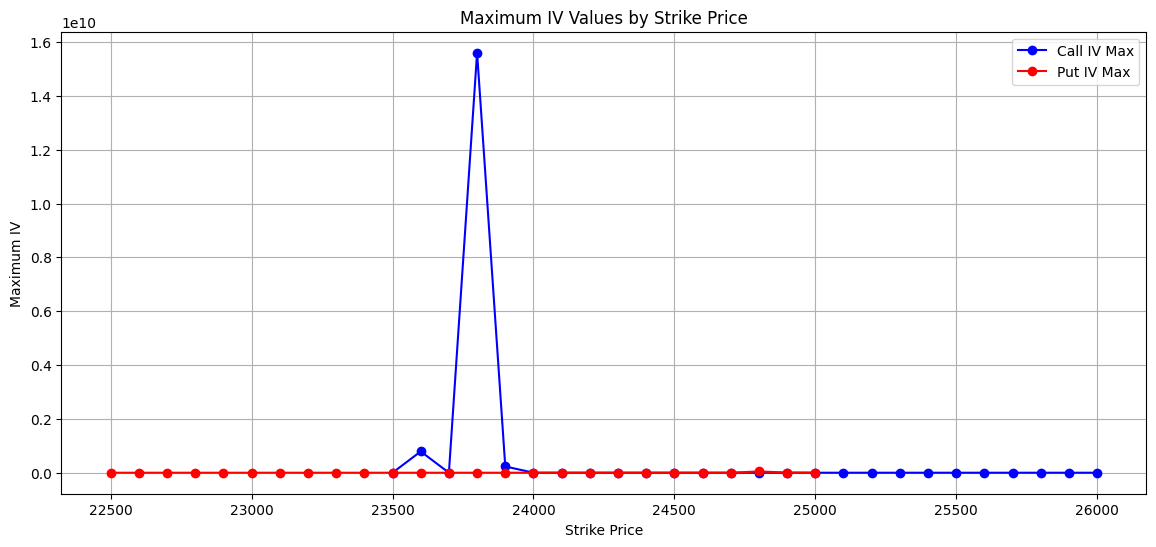

In [10]:
# Get the maximum 10 values for each call and put column
call_max_values = {}
for col in call_cols:
  # Skip columns with all NaN values
  if train_df[col].notna().sum() > 0:
    call_max_values[col] = train_df[col].nlargest(10).values

put_max_values = {}
for col in put_cols:
  # Skip columns with all NaN values
  if train_df[col].notna().sum() > 0:
    put_max_values[col] = train_df[col].nlargest(10).values

# Create a dataframe to display the results
call_df = pd.DataFrame(call_max_values)
put_df = pd.DataFrame(put_max_values)

print("Top 10 maximum values for call columns:")
display(call_df)

print("\nTop 10 maximum values for put columns:")
display(put_df)

# Visualization of the maximum values
plt.figure(figsize=(14, 6))

# Extract the strike prices from column names
call_strikes = [float(col.split('_')[-1]) for col in call_cols]
put_strikes = [float(col.split('_')[-1]) for col in put_cols]

# Plot the maximum value for each strike price
plt.plot(call_strikes, [train_df[col].max() for col in call_cols], 'b-o', label='Call IV Max')
plt.plot(put_strikes, [train_df[col].max() for col in put_cols], 'r-o', label='Put IV Max')

plt.title('Maximum IV Values by Strike Price')
plt.xlabel('Strike Price')
plt.ylabel('Maximum IV')
plt.legend()
plt.grid(True)
plt.show()

Top 10 maximum values for call columns:


,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,...,call_iv_25100,call_iv_25200,call_iv_25300,call_iv_25400,call_iv_25500,call_iv_25600,call_iv_25700,call_iv_25800,call_iv_25900,call_iv_26000
0,0.186658,-1.435870e+12,0.036630,-124418.000000,-96226.50,-0.045733,0.123994,0.074081,0.098799,0.088855,...,0.127407,0.127103,0.128379,0.130255,0.133647,0.137678,0.143072,0.150297,0.159343,-1.0
1,0.186670,-1.435870e+12,0.052268,-62454.000000,-27484.40,0.006816,0.124253,0.110464,0.098858,0.088859,...,0.127533,0.127112,0.128468,0.130468,0.133652,0.137696,0.143100,0.150307,0.159455,-1.0
2,0.186756,-1.435870e+12,0.170961,-29738.800000,-15149.50,0.006816,0.124707,0.111100,0.098877,0.088875,...,0.127536,0.127135,0.128567,0.130597,0.133658,0.137798,0.143103,0.150342,0.159465,-1.0
3,0.186781,-1.435870e+12,0.171126,-1319.640000,-12547.10,0.101139,0.133030,0.111163,0.099023,0.088896,...,0.127541,0.127228,0.128591,0.130633,0.133741,0.137800,0.143126,0.150401,0.159465,-1.0
4,0.186807,-4.993820e+06,0.171143,-0.133078,-12547.10,0.129641,0.133304,0.111236,0.099043,0.088899,...,0.127597,0.127241,0.128607,0.130646,0.133856,0.137827,0.143126,0.150435,0.159542,-1.0
5,0.186837,-4.993820e+06,0.171151,-0.031101,-12547.10,0.130288,0.133470,0.111436,0.099108,0.088901,...,0.127601,0.127241,0.128610,0.130646,0.133927,0.137855,0.143139,0.150446,0.159542,-1.0
6,0.186903,-4.993820e+06,0.171183,0.014043,-8364.59,0.130448,0.133520,0.111452,0.099224,0.088905,...,0.127631,0.127260,0.128614,0.130671,0.133977,0.137929,0.143170,0.150470,0.159559,-1.0
7,0.186907,-4.993820e+06,0.171189,0.045414,-8364.59,0.141522,0.133605,0.111495,0.099248,0.088908,...,0.127633,0.127265,0.128655,0.130680,0.134008,0.137953,0.143195,0.150486,0.159625,-1.0
8,0.186946,-1.251770e+05,0.171195,0.045414,-8364.59,0.146430,0.133608,0.111531,0.099289,0.088915,...,0.127637,0.127283,0.128656,0.130703,0.134017,0.138007,0.143250,0.150492,0.159653,-1.0
9,0.186965,-8.268830e+03,0.171207,0.045414,-8364.59,0.151312,0.133610,0.111621,0.099406,0.088917,...,0.127644,0.127284,0.128682,0.130710,0.134027,0.138011,0.143252,0.150536,0.159653,-1.0



Top 10 maximum values for put columns:


,put_iv_22500,put_iv_22600,put_iv_22700,put_iv_22800,put_iv_22900,put_iv_23000,put_iv_23100,put_iv_23200,put_iv_23300,put_iv_23400,...,put_iv_24100,put_iv_24200,put_iv_24300,put_iv_24400,put_iv_24500,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000
0,0.280004,0.271069,0.261025,0.250862,0.242298,0.233207,0.223832,0.214042,0.204839,0.195874,...,0.123995,0.115095,0.085858,0.088587,0.090677,-569687.000000,0.110091,-44062.4,-49272300.0,-41995.400000
1,0.280078,0.271069,0.261075,0.250955,0.242453,0.233249,0.223882,0.214073,0.204943,0.195883,...,0.124253,0.115167,0.085858,0.088588,0.090765,-337279.000000,0.110096,-44062.4,-49272300.0,-3189.550000
2,0.280082,0.271150,0.261133,0.250970,0.242507,0.233253,0.223934,0.214077,0.204944,0.195906,...,0.125009,0.115177,0.088257,0.088609,0.090793,-54257.500000,0.110109,-44062.4,-49272300.0,-1273.470000
3,0.280139,0.271168,0.261202,0.251014,0.242523,0.233281,0.223936,0.214078,0.204956,0.195913,...,0.134438,0.115322,0.091035,0.088616,0.090860,-54257.500000,0.110113,-44062.4,-439672.0,0.126448
4,0.280148,0.271275,0.261210,0.251045,0.242544,0.233334,0.223961,0.214130,0.204965,0.195914,...,0.134439,0.115338,0.094773,0.088628,0.090890,-0.109125,0.110125,-44062.4,-439672.0,0.126831
5,0.280206,0.271284,0.261256,0.251065,0.242547,0.233337,0.223964,0.214150,0.204972,0.195924,...,0.134451,0.115384,0.094773,0.088635,0.090907,0.100340,0.110151,-44062.4,-439672.0,0.126926
6,0.280319,0.271289,0.261276,0.251093,0.242568,0.233345,0.223981,0.214161,0.205007,0.195933,...,0.134540,0.115385,0.094773,0.088636,0.090923,0.100552,0.110172,-44062.4,-76088.9,0.126995
7,0.280439,0.271310,0.261276,0.251096,0.242569,0.233346,0.223981,0.214174,0.205016,0.195949,...,0.134583,0.115389,0.095428,0.088645,0.090955,0.100751,0.110174,-44062.4,-76088.9,0.127098
8,0.280549,0.271337,0.261287,0.251098,0.242577,0.233354,0.223992,0.214191,0.205018,0.195954,...,0.134620,0.115433,0.096861,0.088657,0.090963,0.100762,0.110194,-44062.4,-76088.9,0.127122
9,0.280551,0.271376,0.261288,0.251105,0.242579,0.233363,0.224001,0.214200,0.205019,0.195956,...,0.134642,0.115453,0.098602,0.088657,0.090975,0.100772,0.110197,-44062.4,-76088.9,0.127338


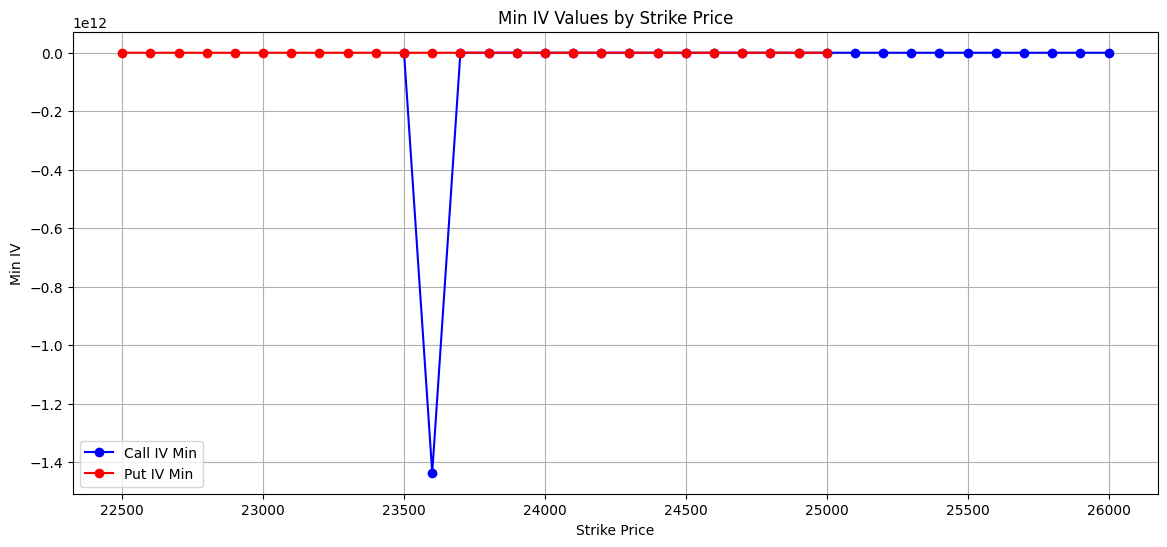

In [19]:
# Get the maximum 10 values for each call and put column
call_min_values = {}
for col in call_cols:
    # Skip columns with all NaN values
    if train_df[col].notna().sum() > 0:
        call_max_values[col] = train_df[col].nsmallest(10).values

put_min_values = {}
for col in put_cols:
    # Skip columns with all NaN values
    if train_df[col].notna().sum() > 0:
        put_max_values[col] = train_df[col].nsmallest(10).values

# Create a dataframe to display the results
call_df = pd.DataFrame(call_max_values)
put_df = pd.DataFrame(put_max_values)

print("Top 10 maximum values for call columns:")
display(call_df)

print("\nTop 10 maximum values for put columns:")
display(put_df)

# Visualization of the maximum values
plt.figure(figsize=(14, 6))

# Extract the strike prices from column names
call_strikes = [float(col.split("_")[-1]) for col in call_cols]
put_strikes = [float(col.split("_")[-1]) for col in put_cols]

# Plot the maximum value for each strike price
plt.plot(
    call_strikes, [train_df[col].min() for col in call_cols], "b-o", label="Call IV Min"
)
plt.plot(
    put_strikes, [train_df[col].min() for col in put_cols], "r-o", label="Put IV Min"
)

plt.title("Min IV Values by Strike Price")
plt.xlabel("Strike Price")
plt.ylabel("Min IV")
plt.legend()
plt.grid(True)
plt.show()

In [32]:
filtered_df = train_df[(train_df[call_cols + put_cols] >= 0) & (train_df[call_cols + put_cols] <= 5)]
filtered_df[call_cols + put_cols].describe()

,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,...,put_iv_24100,put_iv_24200,put_iv_24300,put_iv_24400,put_iv_24500,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000
count,178339.000000,178310.000000,178339.000000,178328.000000,178325.000000,178337.000000,178340.000000,178340.000000,178340.000000,178340.000000,...,178340.000000,178340.000000,178338.000000,178340.000000,178340.000000,178335.000000,178340.000000,178324.000000,178272.000000,178336.000000
mean,0.418795,0.374142,0.344563,0.298307,0.261092,0.231415,0.195213,0.160997,0.140099,0.146883,...,0.197465,0.161484,0.139563,0.146219,0.167526,0.189377,0.215651,0.240230,0.265823,0.300910
std,0.288149,0.231490,0.208711,0.151067,0.110361,0.089600,0.056097,0.032196,0.019030,0.042241,...,0.061196,0.033927,0.019297,0.041308,0.073533,0.102579,0.136148,0.169961,0.201691,0.251393
min,0.186658,0.024363,0.036630,0.014043,0.030329,0.006816,0.123994,0.074081,0.098799,0.088855,...,0.123995,0.115095,0.085858,0.088587,0.090677,0.100340,0.110091,0.118202,0.000413,0.126448
25%,0.256790,0.241743,0.226604,0.210745,0.192554,0.173014,0.161050,0.143029,0.126570,0.120669,...,0.161410,0.142989,0.125098,0.119917,0.129901,0.138012,0.136754,0.139698,0.151927,0.165833
50%,0.297625,0.277056,0.256366,0.235445,0.216572,0.196701,0.174057,0.157880,0.142767,0.142993,...,0.174538,0.157837,0.142583,0.142658,0.145464,0.151955,0.164814,0.177177,0.183324,0.187438
75%,0.404713,0.375352,0.346048,0.315594,0.281387,0.246242,0.210348,0.168074,0.154400,0.154996,...,0.211534,0.168389,0.154447,0.154590,0.170070,0.174239,0.180940,0.197456,0.219300,0.241723
max,2.066750,1.868640,1.632810,1.340190,1.036610,0.829996,0.633309,0.445672,0.259043,0.418226,...,0.649681,0.466512,0.258629,0.405349,0.613943,0.771441,1.009960,1.240350,1.924000,1.755680


In [35]:
filtered_df.max().max()

3.61136

In [36]:
filtered_df.min().min()

0.000412507

In [39]:
filtered_df[call_cols + put_cols].nlargest(10, call_cols + put_cols)

,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,...,put_iv_24100,put_iv_24200,put_iv_24300,put_iv_24400,put_iv_24500,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000
99069,2.06675,1.37073,1.44043,1.21871,0.963258,0.809123,0.593400,0.445672,0.259043,0.164519,...,0.647101,0.466512,0.255318,0.160001,0.306353,0.455694,0.592082,0.832856,1.056920,1.28369
99005,2.03468,1.66665,1.37481,1.11647,0.902044,0.703403,0.490021,0.281487,0.170069,0.157565,...,0.588024,0.387180,0.186293,0.159895,0.347568,0.500632,0.743220,0.959496,1.106830,1.32185
99006,2.00672,1.66665,1.38721,1.15777,0.902044,0.587393,0.490021,0.302001,0.169373,0.157119,...,0.588067,0.386929,0.185880,0.160308,0.356716,0.508987,0.742251,0.921795,1.114610,1.32922
98991,2.00103,1.63417,1.37857,1.24400,0.902044,0.703403,0.570018,0.280058,0.175590,0.157253,...,0.584399,0.383486,0.187616,0.156970,0.337834,0.495106,0.711295,0.886126,1.142280,1.14101
99125,1.98586,1.60783,1.47519,1.20911,0.847350,0.783261,0.473254,0.362435,0.199901,0.157870,...,0.619768,0.424537,0.218416,0.156136,0.359859,0.538062,0.740366,0.807503,1.144580,1.19049
99144,1.97823,1.63583,1.47497,1.15176,0.847350,0.659475,0.510235,0.319885,0.186090,0.154530,...,0.615974,0.415452,0.209375,0.151532,0.360914,0.534598,0.747565,0.926298,1.132570,1.23356
99146,1.94412,1.60001,1.44979,1.24348,0.847350,0.659475,0.510235,0.341471,0.180556,0.153220,...,0.614744,0.414315,0.208349,0.149830,0.365914,0.499775,0.743425,0.954414,1.172250,1.25359
98993,1.93569,1.70518,1.42117,1.16046,0.902044,0.703403,0.570018,0.345050,0.172234,0.157475,...,0.585076,0.384473,0.186070,0.155420,0.341228,0.509297,0.705923,0.920347,1.036650,1.32380
99077,1.93447,1.65576,1.47650,1.08279,0.963258,0.708122,0.606249,0.406822,0.243500,0.155354,...,0.640476,0.445131,0.243320,0.152723,0.314336,0.483507,0.715065,0.812384,0.904724,1.14890
99003,1.92700,1.55507,1.41953,1.19454,0.902044,0.703403,0.434595,0.330194,0.168017,0.156650,...,0.588584,0.388110,0.186821,0.159534,0.349766,0.513281,0.724020,0.958571,0.958541,1.35969


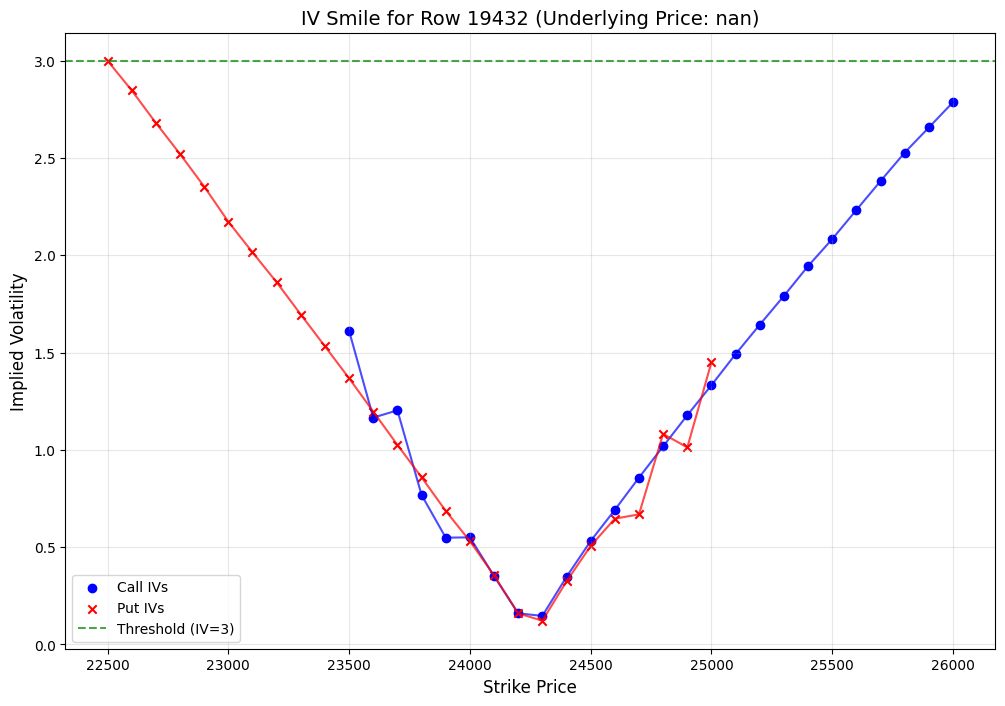

Row index: 19432
Underlying price: nan
Expiry: nan
Max call IV: 2.78749
Max put IV: 3.0006


In [41]:
# First, let's find rows with any call or put IV values greater than 3
all_iv_cols = call_cols + put_cols
high_iv_rows = filtered_df[filtered_df[all_iv_cols].gt(3).any(axis=1)]

if not high_iv_rows.empty:
  # Take the first row with high IV values
  high_iv_row = high_iv_rows.iloc[0]
  row_index = high_iv_rows.index[0]
  
  # Extract strike prices and IV values for calls and puts
  call_strikes = [float(col.split('_')[-1]) for col in call_cols]
  put_strikes = [float(col.split('_')[-1]) for col in put_cols]
  
  call_ivs = high_iv_row[call_cols].values
  put_ivs = high_iv_row[put_cols].values
  
  # Create a plot
  plt.figure(figsize=(12, 8))
  
  # Plot call IVs
  plt.scatter(call_strikes, call_ivs, color='blue', label='Call IVs', marker='o')
  plt.plot(call_strikes, call_ivs, color='blue', linestyle='-', alpha=0.7)
  
  # Plot put IVs
  plt.scatter(put_strikes, put_ivs, color='red', label='Put IVs', marker='x')
  plt.plot(put_strikes, put_ivs, color='red', linestyle='-', alpha=0.7)
  
  plt.title(f'IV Smile for Row {row_index} (Underlying Price: {high_iv_row["underlying"]})', fontsize=14)
  plt.xlabel('Strike Price', fontsize=12)
  plt.ylabel('Implied Volatility', fontsize=12)
  plt.grid(True, alpha=0.3)
  plt.legend()
  
  # Add horizontal line at y=3 to highlight the threshold
  plt.axhline(y=3, color='green', linestyle='--', alpha=0.7, label='Threshold (IV=3)')
  plt.legend()
  
  plt.show()
  
  # Print information about the row
  print(f"Row index: {row_index}")
  print(f"Underlying price: {high_iv_row['underlying']}")
  print(f"Expiry: {high_iv_row['expiry']}")
  print(f"Max call IV: {high_iv_row[call_cols].max()}")
  print(f"Max put IV: {high_iv_row[put_cols].max()}")
else:
  print("No rows found with IV values greater than 3")
  
  # Let's find the maximum IV values and show a row with the highest IV
  max_call_iv = filtered_df[call_cols].max().max()
  max_put_iv = filtered_df[put_cols].max().max()
  
  print(f"Maximum call IV in dataset: {max_call_iv}")
  print(f"Maximum put IV in dataset: {max_put_iv}")
  
  # Find row with the highest IV value
  max_iv_index = filtered_df[all_iv_cols].max(axis=1).idxmax()
  max_iv_row = filtered_df.loc[max_iv_index]
  
  # Create the same plot for the row with maximum IV
  call_strikes = [float(col.split('_')[-1]) for col in call_cols]
  put_strikes = [float(col.split('_')[-1]) for col in put_cols]
  
  call_ivs = max_iv_row[call_cols].values
  put_ivs = max_iv_row[put_cols].values
  
  plt.figure(figsize=(12, 8))
  
  plt.scatter(call_strikes, call_ivs, color='blue', label='Call IVs', marker='o')
  plt.plot(call_strikes, call_ivs, color='blue', linestyle='-', alpha=0.7)
  
  plt.scatter(put_strikes, put_ivs, color='red', label='Put IVs', marker='x')
  plt.plot(put_strikes, put_ivs, color='red', linestyle='-', alpha=0.7)
  
  plt.title(f'IV Smile for Row with Max IV (Row {max_iv_index}, Underlying: {max_iv_row["underlying"]})', fontsize=14)
  plt.xlabel('Strike Price', fontsize=12)
  plt.ylabel('Implied Volatility', fontsize=12)
  plt.grid(True, alpha=0.3)
  plt.legend()
  
  plt.show()
  
  print(f"Row with max IV: {max_iv_index}")
  print(f"Underlying price: {max_iv_row['underlying']}")
  print(f"Expiry: {max_iv_row['expiry']}")

In [49]:
filtered_df[
    [col for col in filtered_df.columns if col not in (call_cols + put_cols)]
] = train_df[[col for col in filtered_df.columns if col not in (call_cols + put_cols)]]
filtered_df

,timestamp,underlying,expiry,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
0,1745296089000000000,24160.9,2025-04-24,0.237872,0.213056,0.191247,0.173081,0.157550,0.146430,0.140084,...,0.013995,0.007922,-1.947502e+05,0.024715,0.530894,-0.002354,-3.224848e+05,-1.600795e+06,13063.446970,445511.363636
1,1745304077000000000,24188.1,2025-04-24,0.236015,0.213177,0.189552,0.169672,0.153648,0.141522,0.134405,...,-0.004976,-0.009555,-1.481909e+06,-0.004020,-1.429919,-0.000843,1.658073e+06,-1.742468e+06,31364.628427,-46123.161765
2,1745313495000000000,24148.6,2025-04-24,0.225757,0.199469,0.178547,0.156187,0.140276,0.130288,0.124253,...,-0.012869,-0.004012,-1.250688e+06,-0.035342,-0.523109,0.013778,-2.646675e+06,-5.051008e+07,-847564.971737,-225333.881579
3,1745313499000000000,24147.4,2025-04-24,0.220805,0.195398,0.176247,0.155271,0.139753,0.129641,0.123994,...,-0.006014,0.004207,6.378700e+05,-0.045472,0.741664,0.002590,-1.607321e+06,4.170899e+05,333918.361928,-114960.453869
4,1745313608000000000,24155.9,2025-04-24,0.220088,0.195815,0.177803,0.156409,0.141458,0.130448,0.124707,...,0.020878,-0.001747,9.592702e+04,0.044814,-0.015472,0.012185,6.820360e+05,4.081106e+06,3309.895833,183946.289063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178335,1746610196000000000,24358.8,2025-05-08,0.421949,0.393037,0.362155,0.330184,0.294492,0.256301,0.218157,...,-0.011905,0.000325,-3.540254e+05,0.050895,-1.121442,0.023504,-1.878804e+05,2.530094e+06,-0.000000,0.000000
178336,1746610197000000000,24359.6,2025-05-08,0.418388,0.390950,0.361965,0.329852,0.294419,0.256173,0.217796,...,0.028344,-0.002219,-2.081719e+05,0.011957,-1.066485,0.017385,1.055536e+06,1.794233e+06,-0.000000,0.000000
178337,1746610198000000000,24358.5,2025-05-08,0.422143,0.394667,0.363130,0.329679,0.294183,0.255927,0.217671,...,-0.034540,0.006087,-2.078984e+05,-0.041227,-1.147740,0.111446,-5.074557e+05,-6.639723e+05,-0.000000,0.000000
178338,1746610199000000000,24358.5,2025-05-08,0.421115,0.394881,0.363162,0.329524,0.294258,0.255608,0.217636,...,-0.023918,-0.013291,-4.520567e+05,-0.035861,-1.680071,0.188765,8.729859e+05,-5.955741e+06,-244659.375000,0.000000


In [50]:
filtered_df.to_csv(f"{temp_path}/filtered_data.csv", index=False)